# Exploring the GoodBook-10K Dataset

This notebook expores the goodbook-10k data set available from [here](https://github.com/zygmuntz/goodbooks-10k) and [here](https://maciejkula.github.io/spotlight/datasets/goodbooks.html).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

label_kwargs = {'fontfamily': 'sans-serif',
                'fontsize': 15}

title_kwargs = {'fontfamily': 'sans-serif',
                'fontsize': 25,
                'fontweight': 'bold'}

tick_kwargs = {'fontfamily': 'sans-serif',
                'fontsize': 5}

In [3]:
# let's just read in all of the data that we'll need
books = pd.read_csv("goodbooks-10k/books.csv")
book_tags = pd.read_csv("goodbooks-10k/book_tags.csv")
ratings = pd.read_csv("goodbooks-10k/ratings.csv")
tags = pd.read_csv("goodbooks-10k/tags.csv")
to_read = pd.read_csv("goodbooks-10k/to_read.csv")

In [4]:
# I always look at the beginning of the table to get a feel for the features and formatting
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
#this just tells me which id this data goes by (book_id, goodreads, or best_book)
ratings.sort_values('book_id').head() 

,user_id,book_id,rating
2174136,29300,1,4
433265,6590,1,3
1907014,7546,1,5
3743260,43484,1,1
1266846,18689,1,5


In [6]:
# I want to organize every book and review according to it's goodreads id. First I'll make a dataframe that
# maps all the id's together. Then I make a dict that just maps between book_id and goodreads_book_id
id_key = books[['book_id','goodreads_book_id','best_book_id','work_id']]
book_to_goodreads_key = pd.Series(id_key.goodreads_book_id.values,index=id_key.book_id).to_dict()

# make a goodreads_book_id column in ratings and filling it!
ratings['goodreads_book_id'] = ratings['book_id'].map(book_to_goodreads_key)
ratings = ratings.drop(['book_id'],axis=1)

# Here I'm just dropping every id that isn't the goodreads id from the book list
books = books.drop(['book_id','best_book_id','work_id'],axis=1)

In [7]:
books.sort_values('goodreads_book_id').head()

,goodreads_book_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
26,1,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
20,2,307,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix (Har...,eng,4.46,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
1,3,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
17,5,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban (Harr...,eng,4.53,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
23,6,332,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire (Harry Pot...,eng,4.53,1753043,1868642,31084,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...


In [8]:
ratings.sort_values('goodreads_book_id').head()

,user_id,rating,goodreads_book_id
101595,344,3,1
410222,1634,5,1
1852697,25153,5,1
269829,6307,5,1
3066307,35099,4,1


In [9]:
books.describe()

,goodreads_book_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5.264697e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,7.575462e+06,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.000000e+00,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,4.627575e+04,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,3.949655e+05,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,9.382225e+06,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,3.328864e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [10]:
# there's clearly something going on with pub year. Let's take a closer look
books.sort_values('original_publication_year',ascending = True).head()

,goodreads_book_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
2075,19351,266,141026286,9.780141e+12,"Anonymous, N.K. Sandars",-1750.0,Shūtur eli sharrī,The Epic of Gilgamesh,eng,3.63,44345,55856,2247,1551,5850,17627,17485,13343,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2141,1375,255,147712556,9.780148e+12,"Homer, Robert Fagles, Bernard Knox",-762.0,Ἰλιάς ; Ὀδύσσεια,The Iliad/The Odyssey,eng,4.03,47825,51098,537,916,2608,10439,17404,19731,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
340,1371,1726,140275363,9.780140e+12,"Homer, Robert Fagles, Frédéric Mugler, Bernard...",-750.0,Ἰλιάς,The Iliad,eng,3.83,241088,273565,4763,7701,20845,68844,89384,86791,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6165,534289,140,069109750X,9.780691e+12,"Anonymous, Richard Wilhelm, Cary F. Baynes, C....",-750.0,易 [Yì],The I Ching or Book of Changes,eng,4.18,12781,14700,275,178,599,2649,4230,7044,https://images.gr-assets.com/books/1406503668m...,https://images.gr-assets.com/books/1406503668s...
78,1381,1703,143039954,9.780143e+12,"Homer, Robert Fagles, E.V. Rieu, Frédéric Mugl...",-720.0,Ὀδύσσεια,The Odyssey,eng,3.73,670326,710757,8101,29703,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...


In [11]:
# actually, this is fine. Gilgamesh was written ~ 1800 BC, let's look at the ratings
ratings['rating'].describe()

count    5.976479e+06
mean     3.919866e+00
std      9.910868e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [12]:
# I want to look at english books for now
eng_books = books[books['language_code'] == 'eng']
non_eng_books = books[books['language_code'] != 'eng']

In [13]:
eng_books.head(10)

,goodreads_book_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,2767052,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,3,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,2657,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,4671,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,11870085,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,eng,4.26,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
7,5107,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,The Catcher in the Rye,eng,3.79,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
9,1885,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,Pride and Prejudice,eng,4.24,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
10,77203,283,1594480001,9.781594e+12,Khaled Hosseini,2003.0,The Kite Runner,The Kite Runner,eng,4.26,1813044,1878095,59730,34288,59980,226062,628174,929591,https://images.gr-assets.com/books/1484565687m...,https://images.gr-assets.com/books/1484565687s...
11,13335037,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,"Divergent (Divergent, #1)",eng,4.24,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
12,5470,995,451524934,9.780452e+12,"George Orwell, Erich Fromm, Celâl Üster",1949.0,Nineteen Eighty-Four,1984,eng,4.14,1956832,2053394,45518,41845,86425,324874,692021,908229,https://images.gr-assets.com/books/1348990566m...,https://images.gr-assets.com/books/1348990566s...


In [14]:
# Let's just get a feeling for where we have missing values
print(
    eng_books.isna().sum(axis=0),
    ratings.isna().sum(axis=0),
    sep = '\n'*2
)

goodreads_book_id              0
books_count                    0
isbn                         510
isbn13                       435
authors                        0
original_publication_year     10
original_title               358
title                          0
language_code                  0
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64

user_id              0
rating               0
goodreads_book_id    0
dtype: int64


In [15]:
# Great! The number of NaN's isn't that bad. Ratings is already clean. Let's make an average ratings column!
averages = ratings.groupby('goodreads_book_id')['rating'].mean()
averages = averages.to_dict()

In [16]:
# Let's get some plots going to assess the data. Let's start by getting the average book rating
# per year (publication date)
id_to_pub_year = pd.Series(books.original_publication_year.values,index=id_key.goodreads_book_id).to_dict()
ratings['year'] = ratings['goodreads_book_id'].map(id_to_pub_year)
av_rating_on_year = ratings.groupby('year')['rating'].mean()

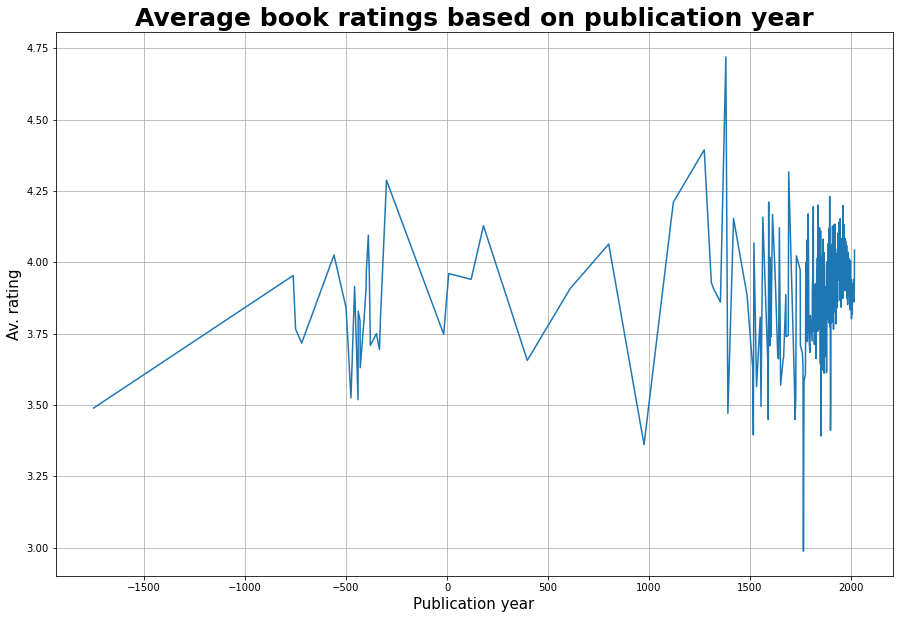

In [17]:
plt.figure(figsize=(15,10))

plt.plot(av_rating_on_year)
plt.title('Average book ratings based on publication year', title_kwargs)
plt.xlabel('Publication year', label_kwargs)
plt.ylabel('Av. rating', label_kwargs)
# plt.ticks(tick_kwargs)
# plt.ylabel(tick_kwargs)
plt.grid(True)
plt.show()

In [75]:
# This isn't super illuminating. Maybe we should bin together every decade? Let's get the goodreads id to
# decade map instead of year map!
id_to_decade_map = {}
for key,value in id_to_pub_year.items():
    if (value<1700):
        id_to_decade_map.update({key:1700})
    else:
        decade = np.floor(value/10)*10
        id_to_decade_map.update({key:decade})

In [76]:
# Getting the average on the decade.
ratings['decade'] = ratings['goodreads_book_id'].map(id_to_decade_map)
av_rating_on_decade = ratings.groupby('decade')['rating'].mean()

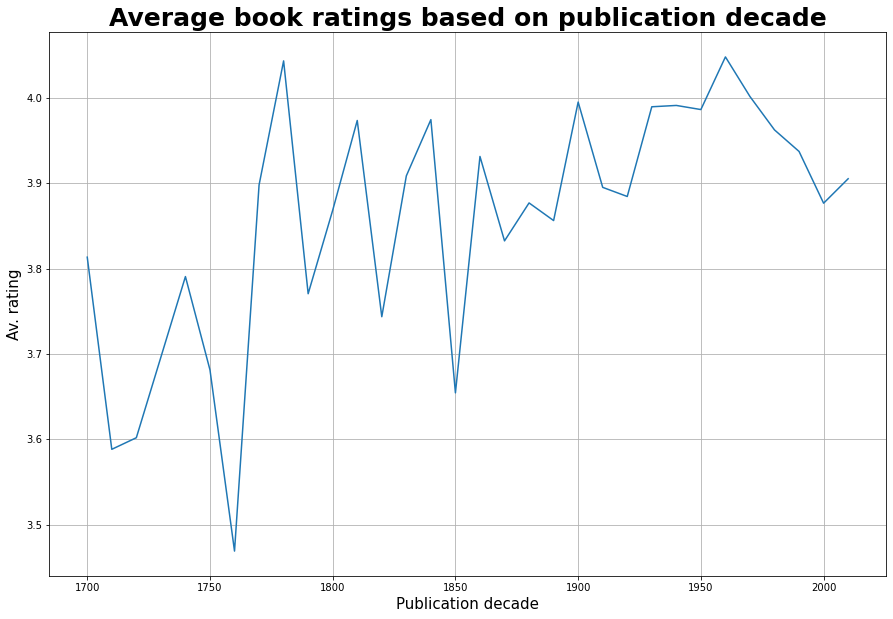

In [77]:
plt.figure(figsize=(15,10))

plt.plot(av_rating_on_decade)
plt.title('Average book ratings based on publication decade', title_kwargs)
plt.xlabel('Publication decade', label_kwargs)
plt.ylabel('Av. rating', label_kwargs)
# plt.ticks(tick_kwargs)
# plt.ylabel(tick_kwargs)
plt.grid(True)
plt.show()